# SME0878 - Mineração Estatística de Dados
## Projeto 3

### Alunos
- Alexandre Batistellas Bellas&emsp;&emsp;&emsp;&nbsp;&emsp;9763168
- Juan Carlos Elias Obando Valdivia&emsp;&nbsp;7487156

### Considerando a base de dados *make circles* abaixo

In [1]:
# Bibliotecas necessárias
import sklearn.datasets as skdata
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

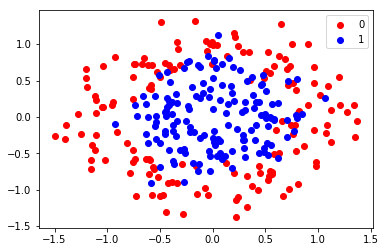

In [2]:
#Gerando a base de dados 2d
np.random.seed(1)

n_samples = 300
X, y = skdata.make_circles(n_samples=n_samples, factor=.5,noise=0.2)

d = np.column_stack((X,np.transpose(y)))
data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

#Plotting
colors = ['red', 'blue', 'green', 'black']
aux = 0

for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1

plt.legend(loc='best')
plt.show(True)

In [3]:
Y = np.array(data[list(data.columns)[-1]],dtype=str)

# Remove the labels from the features
# axis 1 refers to the columns
data = data.drop(list(data.columns)[-1], axis = 1)

# Saving feature names for later use
data_list = list(data.columns)

# Convert to numpy array
X = np.array(data)

## 1) Compare os seguintes algoritmos: (a) Redes Neurais, (b) Naive Bayes, (c) Knn, (d) Random forest. Use as métricas Accuracy, F1, Precision, Recall.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

def metricasKNN (X, Y, p=0.7) :
    metricas_knn = []
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    model = KNeighborsClassifier(n_neighbors=1)
    # Train the model using the training sets
    model.fit(train_x,train_y)
    #Predict Output
    pred_y = model.predict(test_x)
   
    metricas_knn.append(accuracy_score(pred_y, test_y))
    metricas_knn.append(f1_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_knn.append(precision_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_knn.append(recall_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    return metricas_knn

In [5]:
from sklearn.ensemble import RandomForestClassifier

def metricasRandomForest (X, Y, p=0.7) :
    metricas_rf = []
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    clf = RandomForestClassifier(n_estimators = 50)
    
    clf.fit(train_x, train_y)
    
    pred_y = clf.predict(test_x)
    
    metricas_rf.append(accuracy_score(pred_y, test_y))
    metricas_rf.append(f1_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_rf.append(precision_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_rf.append(recall_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    return metricas_rf

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

def metricasNeuralNetworks (X, Y, p=0.7) :
    metricas_nn = []
    
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    scaler = MinMaxScaler()  
    scaler.fit(train_x.astype(float))  
    train_x = scaler.transform(train_x)  
        
    # apply same transformation to test data
    test_x = scaler.transform(test_x)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)
    clf.fit(train_x, train_y)
    
    pred_y = clf.predict(test_x)
    
    metricas_nn.append(accuracy_score(pred_y, test_y))
    metricas_nn.append(f1_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_nn.append(precision_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_nn.append(recall_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    return metricas_nn

In [7]:
from sklearn.naive_bayes import GaussianNB

def metricasNaiveBayes (X, Y, p=0.7) :
    metricas_nb = []
    
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 42)
    gnb = GaussianNB()
    gnb.fit(train_x, train_y)
    
    pred_y = gnb.predict(test_x)
    
    metricas_nb.append(accuracy_score(pred_y, test_y))
    metricas_nb.append(f1_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_nb.append(precision_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    metricas_nb.append(recall_score(test_y, pred_y, labels=None, pos_label="1.0", average="binary", sample_weight=None))
    return metricas_nb

In [8]:
#Obtendo valores das métricas
metricas_knn = metricasKNN(X, Y, p=0.7)
metricas_rf = metricasRandomForest(X, Y, p=0.7)
metricas_nn = metricasNeuralNetworks(X, Y, p=0.7)
metricas_nb = metricasNaiveBayes(X, Y, p=0.7)

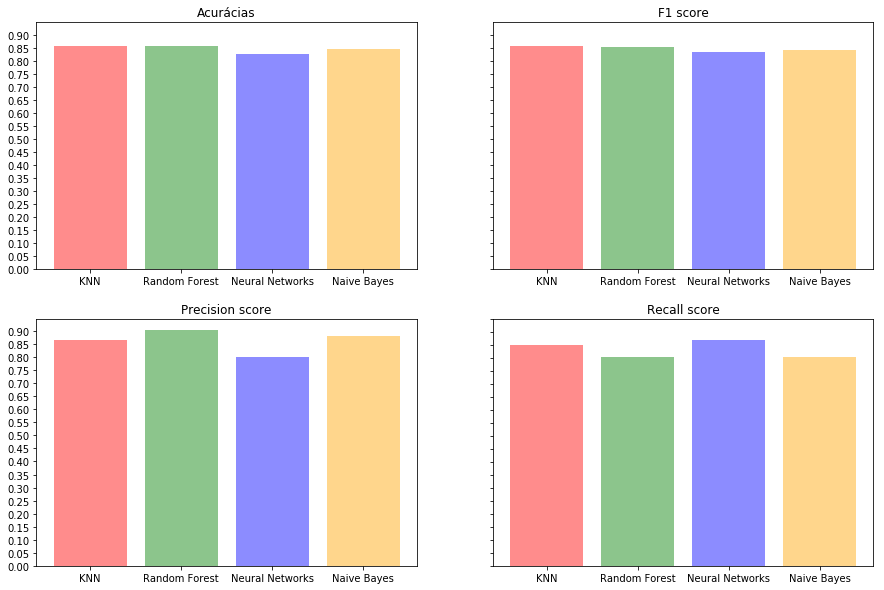

In [9]:
#Plotando em um histograma a comparação de cada métrica
titulo_hist = ["Acurácias", "F1 score", "Precision score", "Recall score"]

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(15,10))

for i in range(4):
    cl = ['KNN','Random Forest', 'Neural Networks', 'Naive Bayes']
    numbers = np.arange(0, len(cl))

    y_hist = [metricas_knn[i], metricas_rf[i], metricas_nn[i], metricas_nb[i]]
    
    x_axs = int(np.floor(i/2))
    y_axs = i%2

    axs[x_axs][y_axs].bar(numbers, y_hist, alpha=.45, color=['red', 'green', 'blue', 'orange'])
    axs[x_axs][y_axs].set_title(titulo_hist[i])
    axs[x_axs][y_axs].xaxis.set_ticks(np.arange(0, 4, 1))
    axs[x_axs][y_axs].yaxis.set_ticks(np.arange(0, 1, 0.05))
    axs[x_axs][y_axs].set_xticklabels(cl)
    
plt.show(True)

Observando os histogramas plotados, vemos que os classificadores KNN e Random Forest possuem maiores acurácias e maiores F1 score. Para o precision score, Random Forest e Naive Bayes são os melhores colocados. Por fim, Neural Networks e KNN são os que possuem maior recall score.<br><br>

Aqui, vemos que o KNN possui altos valores de cada score, mas somente perde no precision score. Isso é um sinal que esse classificador possui muitos falsos positivos em sua classificação, sendo um sinal de sensibilidade a outliers.<br><br>

Por outro lado, vemos que Random Forest também possui altos valores de cada score, entretanto, possui o valor mais baixo de recall score dentre todos os classificadores. Isso é consequência da presença de muitos falsos negativos em sua classificação.<br><br>

Os classificadores Neural Networks e Naive Bayes tendem a ser mais consistentes, diferenciando-se somente no precision score e no recall score. Respectivamente, possuem maior quantidade de falsos positivos e maior quantidade de falsos negativos.<br><br>

Analisando o F1 score de cada classificador, vemos que há uma consistência maior de falsos positivos e negativos nos classificadores KNN e Random Forest, justamente por terem maior valor do score em questão.

### Considere a partir de agora a base de dados sobre diabetes: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 2 - Verifique como a classifição muda quando consideramos o método k-fold, cross validation. Ou seja, faça um gráfico da medida Precison em função de k, para os algoritmos Redes Neurais e Random Forest.

### Pré-processamento da base de dados

In [10]:
#Lendo arquivo diabetes.csv
df_dia = pd.read_csv("data/diabetes/diabetes.csv")
print("Tamanho do dataset:", df_dia.shape)

df_dia.head(10)

Tamanho do dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
#Tirando os valores NaN e duplicados
df_dia = df_dia.replace('?', np.nan)
df_dia = df_dia.dropna()
df_dia = df_dia.drop_duplicates()

#Obtendo as classes únicas do dataset
classes = pd.unique(df_dia[df_dia.columns[-1]])
classes = np.array(classes, dtype=str)
print("Classes únicas no conjunto de dados:\n", classes)

list_labels = list(df_dia.columns)
print("\nAtributos do dataset:\n", list_labels[:-1])

Classes únicas no conjunto de dados:
 ['1' '0']

Atributos do dataset:
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [12]:
#Y é o array que contém a classe
Y = np.array(df_dia[list_labels[-1]], dtype=str)

#X é o array que contém somente os atributos
df_dia = df_dia.drop(list_labels[-1], axis = 1)
X = np.array(df_dia)

In [13]:
#Número de cada classe do dataset
ncl = np.zeros(len(classes))
for i in np.arange(0, len(classes)):
    a = Y == classes[i]
    ncl[i] = len(Y[a])
print(ncl)

[268. 500.]


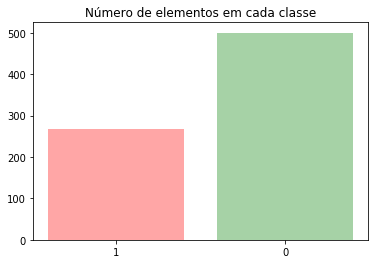

In [14]:
#Frequência das classes
numbers = np.arange(0, len(classes))
plt.bar(numbers, ncl, alpha=.35, color=['red', 'green'])
plt.xticks(numbers, classes)
plt.title('Número de elementos em cada classe')
plt.show(True)

In [15]:
#Padronizando os dados para melhorar os resultados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

kprecision_rf = []
kprecision_nn = []
list_k = []

#Variando o número de folds k
for k in range(2, 11):
    list_k.append(k)
    kf = KFold(n_splits=k)
    vprecision = []
    
    #Random Forest
    for train_index, test_index in kf.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        clf = RandomForestClassifier(random_state=0, n_estimators=100)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        vprecision.append(precision_score(y_test, y_pred, average=None))
    
    kprecision_rf.append(np.mean(vprecision))
    
    vprecision = []
    
    #Neural Networks
    for train_index, test_index in kf.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        #Normalizando os dados
        scaler = MinMaxScaler()  
        scaler.fit(x_train.astype(float))  
        x_train = scaler.transform(x_train)  
        
        #Devemos normalizar também o conjunto de testes
        x_test = scaler.transform(x_test)
        
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)
        clf.fit(x_train, y_train);
        y_pred = clf.predict(x_test)
        
        vprecision.append(precision_score(y_test, y_pred, average=None))
    
    kprecision_nn.append(np.mean(vprecision))

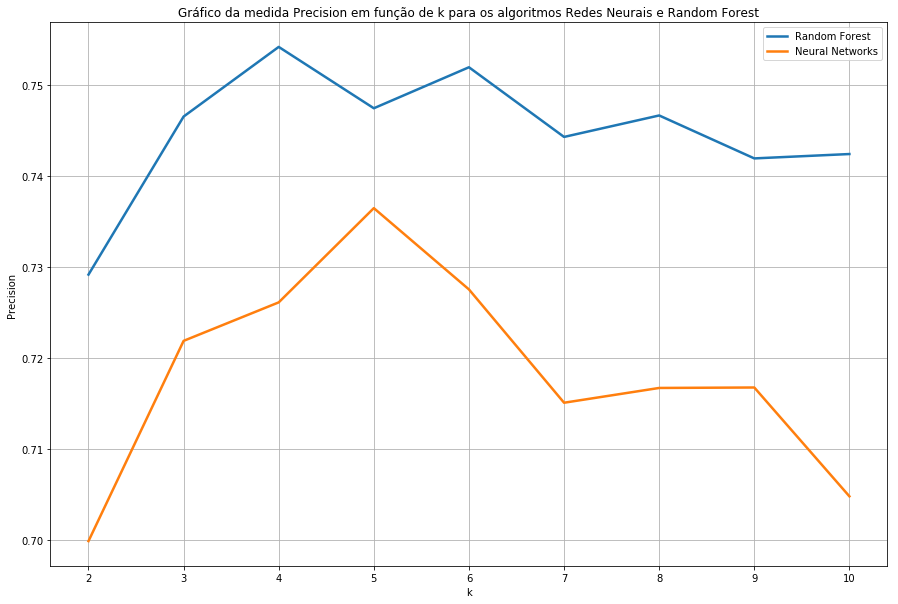

In [17]:
#Plotando
plt.figure(figsize=(15,10))

plt.title("Gráfico da medida Precision em função de k para os algoritmos Redes Neurais e Random Forest")
plt.xlabel("k")
plt.ylabel("Precision")
plt.plot(list_k, kprecision_rf, label='Random Forest', linewidth=2.5)
plt.plot(list_k, kprecision_nn, label='Neural Networks', linewidth=2.5)
plt.legend(loc='best')
plt.grid(True)

Para um número grande ou pequeno de folds, vemos que a medida Precision fica comprometida.

## 3 - Compare os classificadores Redes Neurais, Naïve Bayes e Random Forest para k = 10 (k-fold cross validation estratificado) em termos da curva ROC. Qual classificador é o melhor? Justifique.

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp

def plotarCurvaROCmedia(X, Y, clf, normalize=False, class_name="o classificador"):
    i = 0
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    plt.figure(figsize=(15,8))

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    #k fold cross validation estratificado
    for train_index, test_index in cv.split(X, Y):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        #Normalizando dados (se preciso)
        if normalize == True:
            scaler = MinMaxScaler()  
            scaler.fit(x_train.astype(float))  
            x_train = scaler.transform(x_train)
            x_test = scaler.transform(x_test)

        #Treinando classificador
        clf.fit(x_train, y_train)

        #Obtendo a curva ROC para o fold em questão
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_predict_probabilities, pos_label="1")
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

        #Obtendo Area Under Curve
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        #Plotando a ROC do treinamento realizado no fold, com certa transparência
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1

    #Curva x = y no gráfico
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Curva x = y', alpha=.8)

    #Obtendo a curva ROC média
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    #Plotando a curva ROC média
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'ROC média (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.title('Curva ROC média para %s' % class_name)
    plt.legend(loc="best")
    plt.show()

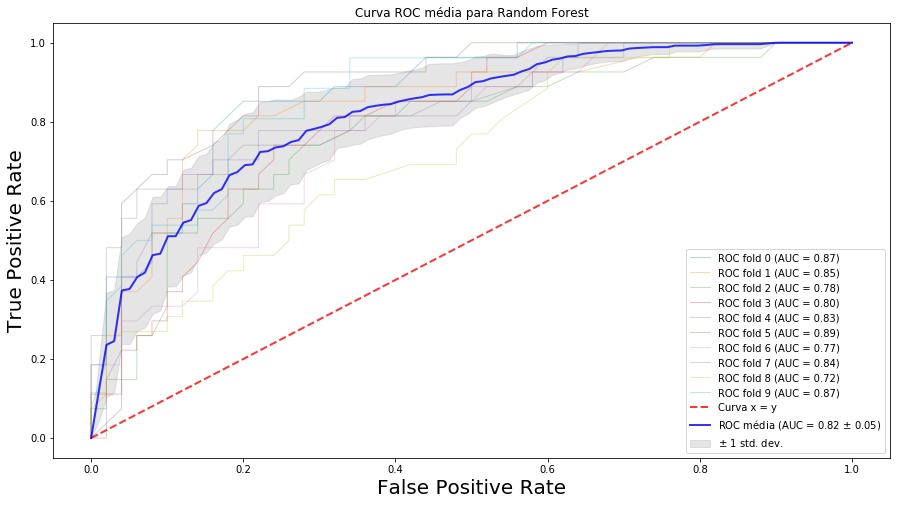

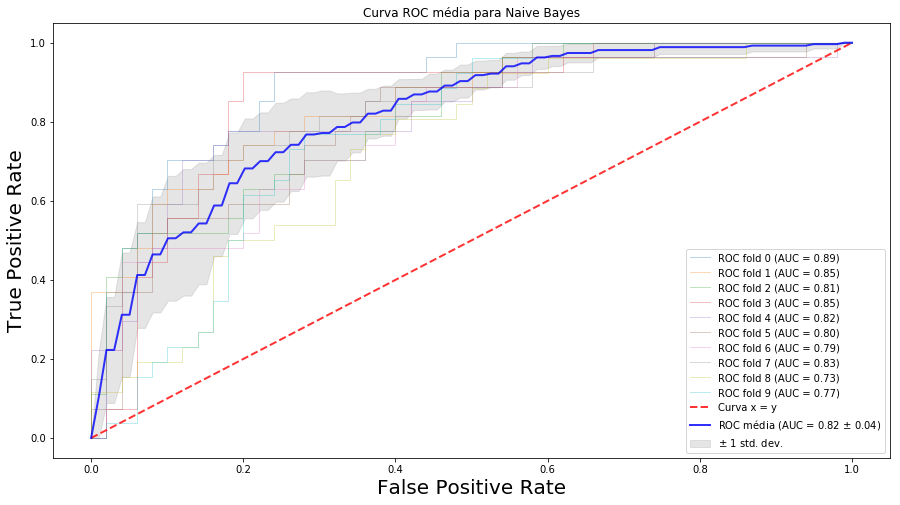

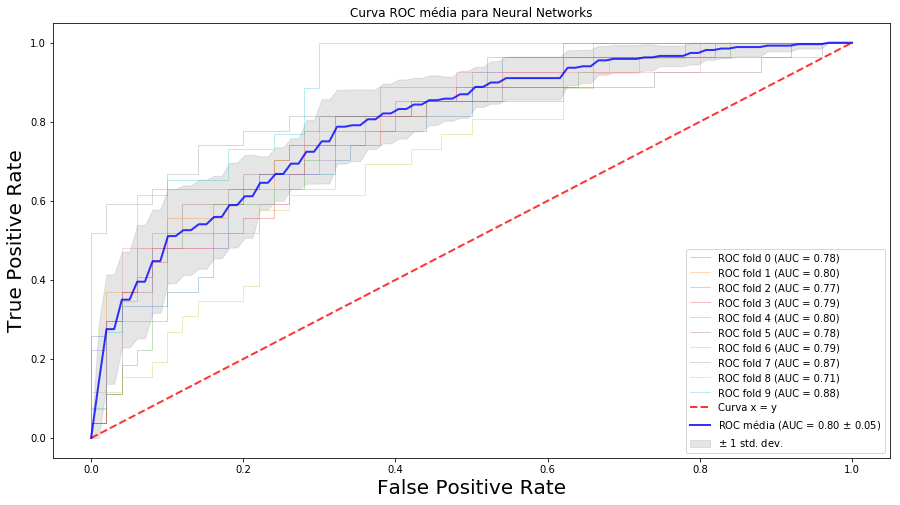

In [19]:
rf = RandomForestClassifier(n_estimators=100)
gnb = GaussianNB()
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)

plotarCurvaROCmedia(X, Y, rf, False, "Random Forest")
plotarCurvaROCmedia(X, Y, gnb, False, "Naive Bayes")
plotarCurvaROCmedia(X, Y, mlp, True, "Neural Networks")

Analisando a AUC média da curva ROC plotada, vemos que o classificador Naive Bayes, junto do Random Forest, possui maior valor. Além disso, o Naive Bayes possui maior consistência, por conta de seu desvio padrão ser menor que o Random Forest. Assim, vemos que o algoritmo Naive Bayes é o melhor classificador dentre os três, por conta de seu valor AUC ser consistentemente maior que os outros.

## 4 – Usando o método que seleciona apenas um atributo por vez (univariado, teste qui-quadrado), faça uma curva da medida F1 em função do número de atributos considerados. Isto é, obtenha F1 para o atributo mais importante, depois para os dois mais importantes e assim por diante.

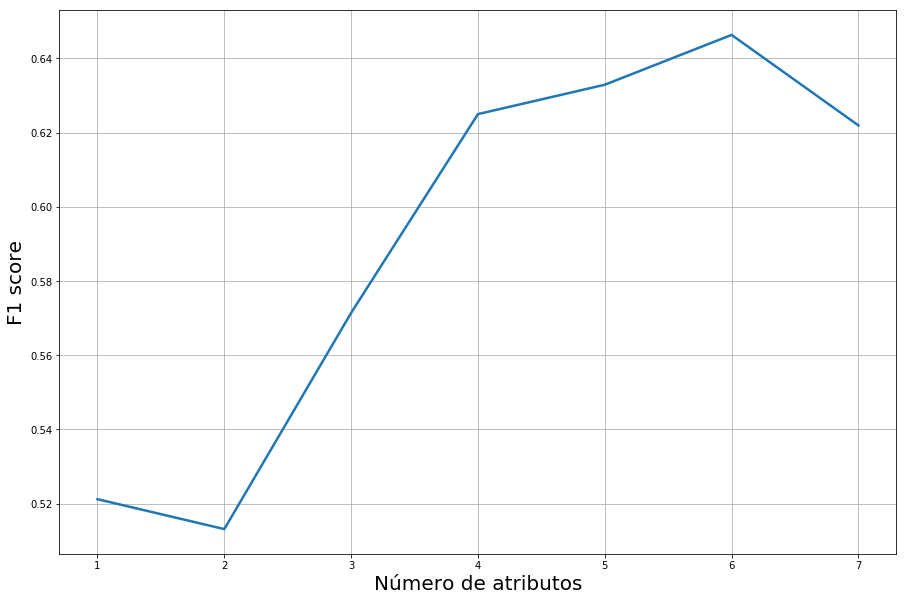

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Obtendo X normalizado => evitar dados negativos
scaler = MinMaxScaler()  
scaler.fit(X.astype(float))  
X_norm = scaler.transform(X)

#Eixos do gráfico
score = []
nfeat = []

#Iterando sobre o número de atributos
for nfeatures in np.arange(1, len(list_labels)-1):
    nfeat.append(nfeatures)
    
    #Selecionando os melhores atributos
    test = SelectKBest(score_func=chi2, k=nfeatures)
    fit = test.fit(X_norm, Y)
    
    np.set_printoptions(precision=3)
    features = fit.transform(X_norm)

    idx = (-fit.scores_).argsort()[:nfeatures]
    XS = features
    
    #Treinando um classificador Random Forest
    p = 0.7
    train_x, test_x, train_y, test_y = train_test_split(XS, Y, test_size=1-p, random_state = 42)

    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    
    score.append(f1_score(pred_y, test_y, labels=None, pos_label="1", average="binary", sample_weight=None))

#Plotando
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(nfeat, score, linewidth=2.5)
plt.ylabel("F1 score", fontsize=20)
plt.xlabel("Número de atributos", fontsize=20)
plt.show(True)

## 5 – Projete os dados usando PCA e faça um gráfico de F1 em termos do número de components. Quantos components oferecem a maior taxa de acerto? Compare com a curva “cumulative explained variance” versus “number of components” e explique os resultados.

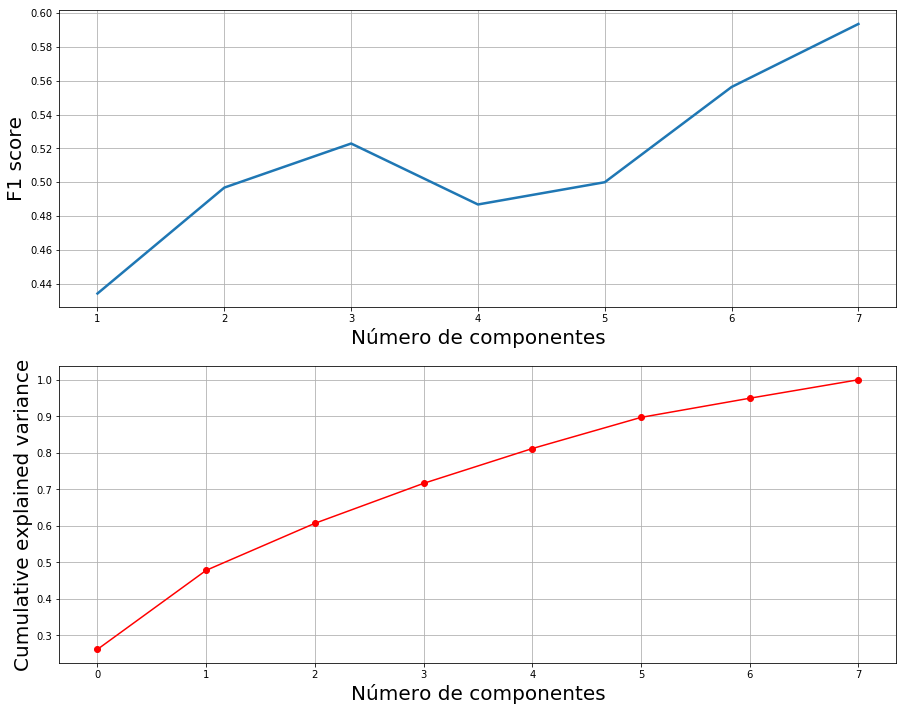

In [21]:
from sklearn.decomposition import PCA

score = []
ncomps = []

#Iterando sobre o número de componentes para o PCA
for n_components in np.arange(1, len(list_labels)-1):
    ncomps.append(n_components)
    
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X_norm)
    
    #Treinando um classificador Random Forest
    p = 0.7
    train_x, test_x, train_y, test_y = train_test_split(X_pca, Y, test_size=1-p, random_state = 42)

    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    
    score.append(f1_score(pred_y, test_y, labels=None, pos_label="1", average="binary", sample_weight=None))

#Plotando ambos os gráficos
fig, axs = plt.subplots(2, 1, figsize=(15,12))

axs[0].grid(True)
axs[0].plot(ncomps, score, linewidth=2.5)
axs[0].set_ylabel("F1 score", fontsize=20)
axs[0].set_xlabel("Número de componentes", fontsize=20)

pca = PCA().fit(X)
axs[1].plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
axs[1].set_xlabel('Número de componentes', fontsize=20)
axs[1].set_ylabel('Cumulative explained variance', fontsize=20);
axs[1].grid(True)
plt.show(True)

Vemos que o maior número possível de componentes (igual a 7) oferece a maior taxa de acerto (ou seja, o maior valor para F1 score). Comparando ao gráfico de "cumulative explained variance", vemos que quanto maior a variância dos dados presente no conjunto de treinamento/teste, maior é a taxa de acerto, por conta de ter maior informação e maior discriminação no momento do treinamento e teste.

## 6 – Considere agora a base de dados do Titanic, conforme descrita em: https://paulovasconcellos.com.br/competicao-kaggle-titanic-tutorial-5b11993774f7
## Construa a curva ROC para as redes neurais e random forest. Identifique os atributos mais importantes usando o método wrapper. Construa um gráfico da medida Precision em função do número de atributos usados. É possível melhorar a classificação considerando um número reduzido de atributos?

### Pré-processamento

In [22]:
#Lendo base de dados do Titanic
df_tit = pd.read_csv("data/titanic/train.csv")
print("Tamanho do dataset:", df_tit.shape)
df_tit.head(10)

Tamanho do dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
#Tirando os valores NaN e duplicados
df_tit = df_tit.replace('?', np.nan)
df_tit = df_tit.dropna()
df_tit = df_tit.drop_duplicates()

In [24]:
#Deletando os atributos string do dataset (influenciarão os resultados no futuro)
atrib_delete = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for idx in atrib_delete:
    df_tit = df_tit.drop(idx, axis=1)

In [25]:
#Obtendo as classes únicas do dataset
classes_tit = pd.unique(df_tit[df_tit.columns[1]])
classes_tit = np.array(classes_tit, dtype=str)
print("Classes únicas no conjunto de dados:\n", classes_tit)

list_labels_tit = list(df_tit.drop('Survived', axis=1).columns)
print("\nAtributos do dataset:\n", list_labels_tit)

Classes únicas no conjunto de dados:
 ['1' '0']

Atributos do dataset:
 ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [26]:
#Y é o array que contém a classe
Y_tit = np.array(df_tit['Survived'], dtype=str)

#X é o array que contém somente os atributos
X_tit = np.array(df_tit.drop('Survived', axis=1))

In [27]:
#Número de cada classe do dataset
ncl_tit = np.zeros(len(classes_tit))
for i in np.arange(0, len(classes_tit)):
    a = Y_tit == classes_tit[i]
    ncl_tit[i] = len(Y_tit[a])
print("\nFrequência de cada classe:", classes_tit, ncl_tit)


Frequência de cada classe: ['1' '0'] [123.  60.]


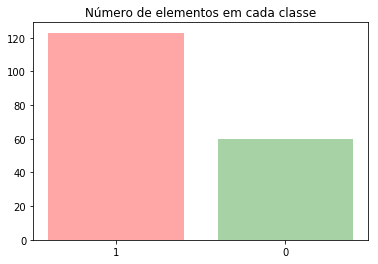

In [28]:
#Frequência das classes
numbers_tit = np.arange(0, len(classes_tit))
plt.bar(numbers_tit, ncl_tit, alpha=.35, color=['red', 'green'])
plt.xticks(numbers_tit, classes_tit)
plt.title('Número de elementos em cada classe')
plt.show(True)

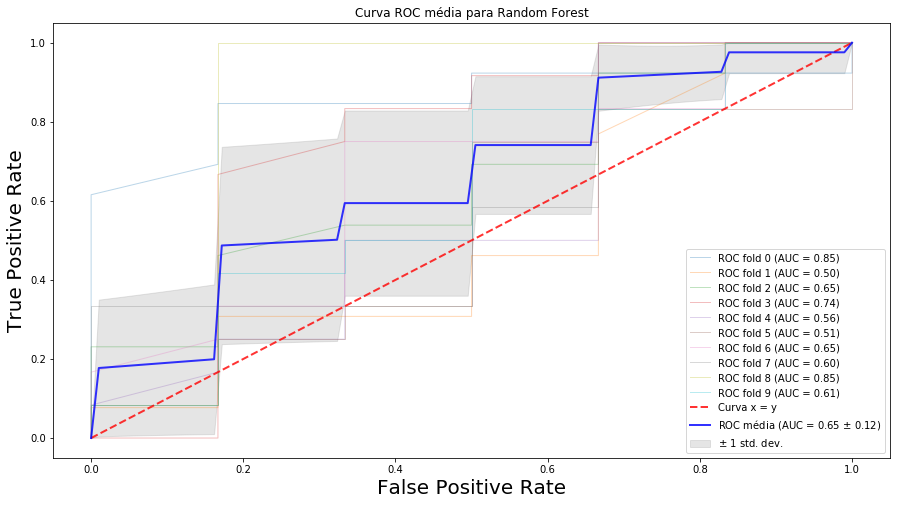

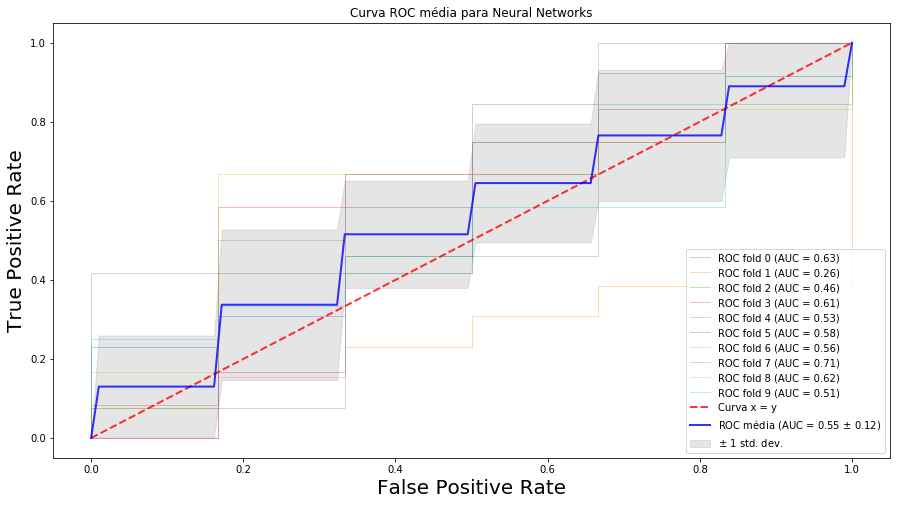

In [29]:
#Aplicando stratified k-fold cross validation para obter a curva ROC
rf = RandomForestClassifier(n_estimators=100)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)

plotarCurvaROCmedia(X_tit, Y_tit, rf, False, "Random Forest")
plotarCurvaROCmedia(X_tit, Y_tit, mlp, True, "Neural Networks")

### Random Forest

In [30]:
#Aplicando método wrapper para obter os melhores atributos
from sklearn.feature_selection import RFE

score = []
nfeat = []

#Iterando sobre o número de atributos
for nfeatures in np.arange(1, len(X_tit[0])):
    nfeat.append(nfeatures)
    
    #Extraindo os atributos para o modelo selecionado
    model = RandomForestClassifier(n_estimators=100)
    rfe = RFE(model, nfeatures)
    fit = rfe.fit(X_tit, Y_tit)
    
    print('Número de atributos:', fit.n_features_)
    print('\nAtributos mais importantes selecionados: ')
    f_selected = []
    
    #Printando os atributos mais importantes
    for f in np.arange(0, len(fit.support_)):
        if(fit.support_[f] == True):
            print(list_labels_tit[f])
            f_selected.append(list_labels_tit[f])
            
    #Treinando o conjunto de dados
    XS = np.array(df_tit[f_selected])
    p = 0.7
    train_x, test_x, train_y, test_y = train_test_split(XS, Y_tit, test_size = 1-p, random_state = 42)

    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    
    score.append(precision_score(test_y, pred_y,
                                 labels=None, pos_label="1", average="binary", sample_weight=None))

Número de atributos: 1

Atributos mais importantes selecionados: 
Fare
Número de atributos: 2

Atributos mais importantes selecionados: 
PassengerId
Fare
Número de atributos: 3

Atributos mais importantes selecionados: 
PassengerId
Age
Fare
Número de atributos: 4

Atributos mais importantes selecionados: 
PassengerId
Age
SibSp
Fare
Número de atributos: 5

Atributos mais importantes selecionados: 
PassengerId
Age
SibSp
Parch
Fare


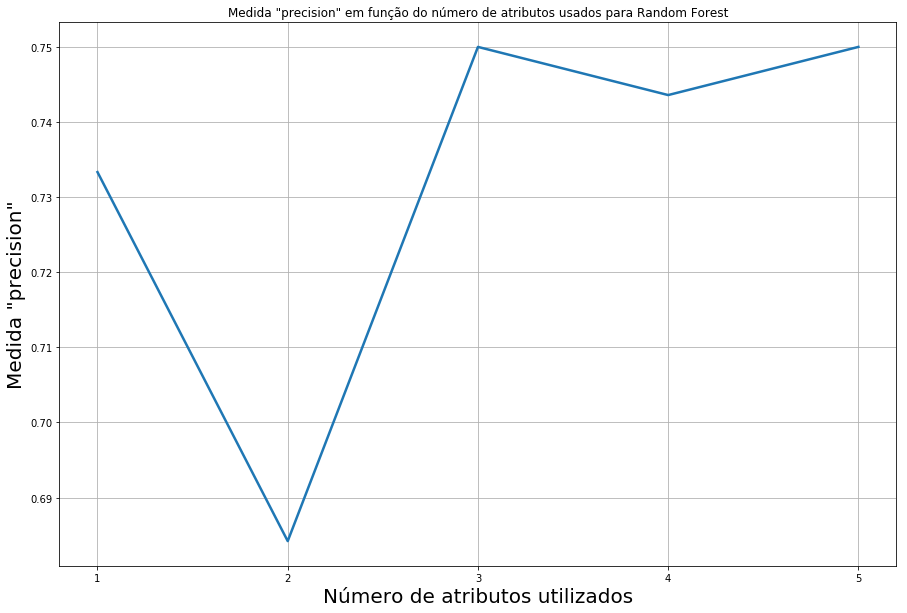

In [31]:
plt.figure(figsize=(15,10))
plt.plot(nfeat, score, linewidth=2.5)
plt.title("Medida \"precision\" em função do número de atributos usados para Random Forest")
plt.xlabel("Número de atributos utilizados", fontsize=20)
plt.ylabel("Medida \"precision\"", fontsize=20)
plt.xticks(np.arange(1, 6, 1))
plt.grid(True)
plt.show(True)

Podemos ver que há um valor de atributos menor que o máximo que oferece o maior valor possível para a medida "precision". Dessa forma, podemos, de fato, melhorar a classificação com menos atributos.